In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
def get_new_feature_name_df (old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                              if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [3]:
pd.options.display.max_rows = 99
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [4]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header = None, names=['column_index', 'column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

## 결정트리

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [6]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8588


In [7]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 6)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8568


In [8]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 8)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8578


In [9]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8588


In [10]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 12)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8582


In [11]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 14)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8571


In [12]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 16)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8565


In [13]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 18)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8568


In [14]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 5)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8755


In [15]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8677


In [16]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 3)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8656


In [17]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8775


In [18]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 7)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8666


In [19]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_depth = 5)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8385


In [20]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_depth = 7)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8663


In [21]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_depth = 9)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8772


In [22]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_depth = 10)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8748


In [23]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_leaf_nodes = 30)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8697


In [24]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_leaf_nodes = 40)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8731


In [25]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_leaf_nodes = 50)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8795


In [26]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_leaf_nodes = 60)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8799


In [27]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_leaf_nodes = 70)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8761


### 가장 정확도 높은 경우

In [28]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 10, min_samples_leaf = 6, max_leaf_nodes = 60)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8799


<function matplotlib.pyplot.show(close=None, block=None)>

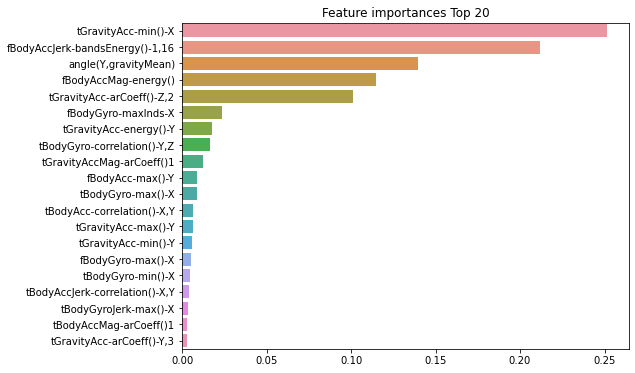

In [29]:
import seaborn as sns

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show

## 랜덤 포레스트

In [30]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9253


In [31]:
rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 15)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9152


In [32]:
rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 20)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9148


In [33]:
rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 30)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9216


In [34]:
rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 35)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9182


In [35]:
rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9125


In [36]:
rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 12)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9125


In [37]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 4)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9260


In [38]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 6)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9264


In [39]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [40]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 10)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9213


In [41]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 12)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9223


In [42]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [43]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 16)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9270


In [44]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 18)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9274


In [45]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 20)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9287


In [46]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 22)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9206


##### case1. min_samples_split = 8 (0.9298)

In [47]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, min_samples_leaf = 5)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9294


In [48]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, min_samples_leaf = 4)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9223


In [49]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, min_samples_leaf = 3)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9257


In [50]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, min_samples_leaf = 2)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9287


In [51]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, min_samples_leaf = 6)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9243


In [52]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_features = 100)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9158


In [53]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_features = 150)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9121


In [54]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_features = 200)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9104


In [55]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_features = 250)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9094


In [56]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_features = 300)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9050


In [57]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 5)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.8914


In [60]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9182


In [61]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 10)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9237


In [62]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 13)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9287


In [63]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 15)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9264


In [64]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 20)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9294


In [65]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 25)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [66]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 30)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [68]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9301


In [69]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 50)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9162


In [70]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 60)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9199


In [72]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 70)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9240


In [73]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 80)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9237


In [74]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 90)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9253


In [75]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 100)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9274


In [76]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 110)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9264


In [77]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 120)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9281


In [78]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 130)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9274


In [79]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 140)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9267


In [80]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 150)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [81]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 160)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9291


In [82]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 170)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9301


In [83]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 180)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9311


In [84]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 190)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9304


#### case2. min_samples_split = 14

In [58]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 5)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9247


In [85]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 4)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9253


In [86]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 3)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9267


In [87]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 2)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9220


In [88]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 6)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9277


In [89]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 7)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9220


In [90]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9240


In [91]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 9)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9240


In [92]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 10)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9250


In [93]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 11)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9226


In [94]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 12)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9240


In [95]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, min_samples_leaf = 13)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9226


In [96]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_features = 100)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9165


In [97]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_features = 200)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9074


In [98]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_features = 300)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9053


In [100]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_features = 400)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9080


In [99]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_features = 500)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.8996


In [101]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 15)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9264


In [102]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 20)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9277


In [103]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 25)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [104]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 30)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [105]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 24)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [106]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 23)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9298


In [107]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 22)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9294


In [108]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_depth = 21)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9287


In [109]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_leaf_nodes = 150)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9233


In [110]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_leaf_nodes = 160)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9243


In [111]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_leaf_nodes = 170)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9243


In [112]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_leaf_nodes = 180)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9240


In [113]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 14, max_leaf_nodes = 190)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9237


### 가장 정확도 높은 경우

In [114]:
rf_clf = RandomForestClassifier(random_state = 0, min_samples_split = 8, max_depth = 24, max_leaf_nodes = 180)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9311


<function matplotlib.pyplot.show(close=None, block=None)>

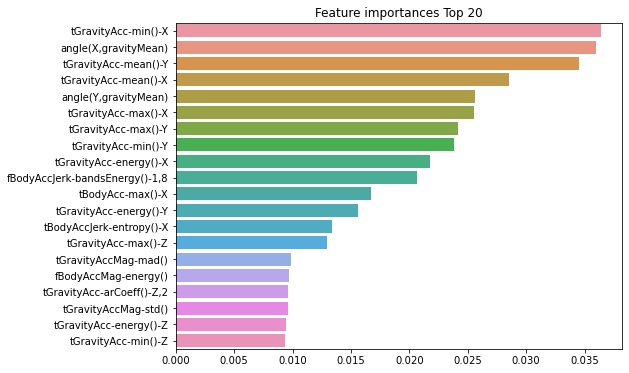

In [59]:
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show